# 322. Coin Change
# https://leetcode.com/problems/coin-change/
# Jagadeesh Vasudevamurthy

In [45]:
############################################################
# L0322.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
# All imports
###########################################################
from typing import List
from time import process_time 


class Solution:
    ## YOU CANNOT CHANGE THIS INTERFACE
    ## LEETCODE INTERFACE
    def coinChange(self, coins: List[int], amount: int) -> int:
        ## YOU CANNOT CHANGE ANYTHING IN THIS PROCEDURE
        work = [0]
        changes = [] #If change cannot be given, you must put -1 in changes[0]
        show = False
        p = L0322(coins,amount,changes,work,show)
        num_change = len(changes)
        if (num_change == 1):
            if (changes[0] == -1):
                num_change = -1
        return num_change

class L0322:
    def __init__(self, coins: List[int], amount:'int', changes:'list of int', work:'List of size 1',show:'boolean'):
        #NOTHING CAN BE CHANGED
        self._d = coins
        self._n = amount
        self._ans = changes
        self._work = work
        self._show = show
        # YOU MUST GENERATE V table and k table
        self._v = [float('inf')] * (self._n + 1) 
        self._v[0] = 0
        self._k = [0] * (self._n + 1)
        # You can have any number of data structures here
        self._changes = changes
        # MUST WRITE TWO ROUTINES
        self._alg()
        self._get_solution() 

    def _increment_work(self):
        self._work[0] = self._work[0] + 1


    ############################################################
    # WRITE CODE BELOW
    ###########################################################

    ############################################################
    # TIME (n * k ) = O(n)
    # SPACE O(n)
    ############################################################
    def _alg(self):
        #print("WRITE CODE")
        for coin in self._d:
            for i in range(coin, self._n + 1):
                if self._v[i] > self._v[i - coin] + 1:
                    self._v[i] = self._v[i - coin] + 1
                    self._k[i] = coin  
                self._increment_work()

        if self._v[self._n] != float('inf'):
            self._ans.append(self._v[self._n])
        else:
            self._ans.clear()
            self._ans.append(-1)
            self._changes.clear()
        

    ############################################################
    # NOTHING CAN BE CHANGED IN THIS ROUTINE BELOW
    ###########################################################
    def _get_solution(self):
        if (self._show):
            a = []
            for i in range(self._n + 1):
                a.append(i)
            print(a)
            print(self._v)
            print(self._k)
        if (self._n < 1000):
            for i in range(self._n + 1):
                if (self._show):
                    print("minimum change for",i,"cents can be achieved using",self._v[i],"coins.")
                self._get_solution1(i)
        else:
            self._get_solution1(self._n)
            
    ############################################################
    # TIME O(n)
    # SPACE THETA(1)
    # How will you give change for p cents
    # WRITE CODE BELOW
    ############################################################
    def _get_solution1(self,p:'int'):
        #print("WRITE CODE")
        self._changes.clear()

        if self._v[p] == float('inf'):
            self._changes.append(-1)
            return

        coins_used = []
        while p > 0:
            for coin in self._d:
                if p - coin >= 0 and self._v[p - coin] == self._v[p] - 1:
                    coins_used.append(coin)
                    p -= coin
                    break
        self._changes.extend(coins_used)

##  CANNOT CHANGE ANYTHING BELOW

## TEST BENCH

In [46]:
############################################################
# L0322Test.py
# Author: Jagadeesh Vasudevamurthy
# Copyright: Jagadeesh Vasudevamurthy 2020
###########################################################

############################################################
#              NOTHING CAN BE CHANGED IN THIS FILE
###########################################################

############################################################
# All imports
###########################################################
#from L0322 import *
from typing import List
from time import process_time 

class L0322Test:
    def __init__(self):
        self._show = True 
        self._num = 0 
        self._test()

        
    def _test1(self,coins: 'List[int]', amount: int, eans:'int'):
        self._num = self._num + 1
        print("______________________Problem", self._num, "---------------------------------" )
        work = [0]
        changes = [];
        p = L0322(coins,amount,changes,work,self._show)
        num_change = len(changes)
        if (num_change == 1):
            if (changes[0] == -1):
                num_change = -1
        if (self._show == False):
            print("Expected minimal change is",eans,". your answer is",num_change)
        if (num_change != eans):
            print("Expected minimal change is",eans,". But your answer is",num_change)
            assert(False)
        if (num_change != -1):
            s = 0 ;
            for e in changes:
                s = s + e
            if (s != amount):
                print("You are giving me",amount,".But you should give me",s,"> I will call cops")
                assert(False)
        if (amount):
            if (work[0] == 0):
                print("How did you solve the problem with no work?")
                assert(False)
            else:
                print("WORK = ", work[0])



    def _test(self):
        self._show = True
        w = [1,3,4]
        c = 6 
        e = 2
        self._test1(w,c,e)

        w = [1,2,6,10,24,30,90]
        c = 100 
        e = 2
        self._test1(w,c,e)

        w = [1,2,6,10,24,30,90]
        c = 34 
        e = 2
        self._test1(w,c,e)

        w = [1,5,10,25]
        c = 25 
        e = 1
        self._test1(w,c,e)

        w = [1,5,10,25]
        c = 16
        e = 3
        self._test1(w,c,e)

        w = [1]
        c = 0 ;
        e = 0
        self._test1(w,c,e)

        w = [1]
        c = 1 
        e = 1
        self._test1(w,c,e)

        w = [1]
        c = 2 
        e = 2
        self._test1(w,c,e)

        w = [2]
        c = 3 
        e = -1
        self._test1(w,c,e)

        self._show = False
        w = [186,419,83,408]
        c = 6249 
        e = 20
        self._test1(w,c,e)

        self._show = False
        w = [474,83,404,3]
        c = 264
        e = 8
        self._test1(w,c,e)

############################################################
# main 
# YOU CANNOT CHANGE ANYTHING BELOW
###########################################################
def main():
    print("Testing L0322Test Starts")
    s = L0322Test()
    print("Testing L0322Test ENDS")

############################################################
# 
###########################################################
if (__name__  == '__main__'):
    main()

Testing L0322Test Starts
______________________Problem 1 ---------------------------------
[0, 1, 2, 3, 4, 5, 6]
[0, 1, 2, 1, 1, 2, 2]
[0, 1, 1, 3, 4, 4, 3]
minimum change for 0 cents can be achieved using 0 coins.
minimum change for 1 cents can be achieved using 1 coins.
minimum change for 2 cents can be achieved using 2 coins.
minimum change for 3 cents can be achieved using 1 coins.
minimum change for 4 cents can be achieved using 1 coins.
minimum change for 5 cents can be achieved using 2 coins.
minimum change for 6 cents can be achieved using 2 coins.
WORK =  13
______________________Problem 2 ---------------------------------
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 9

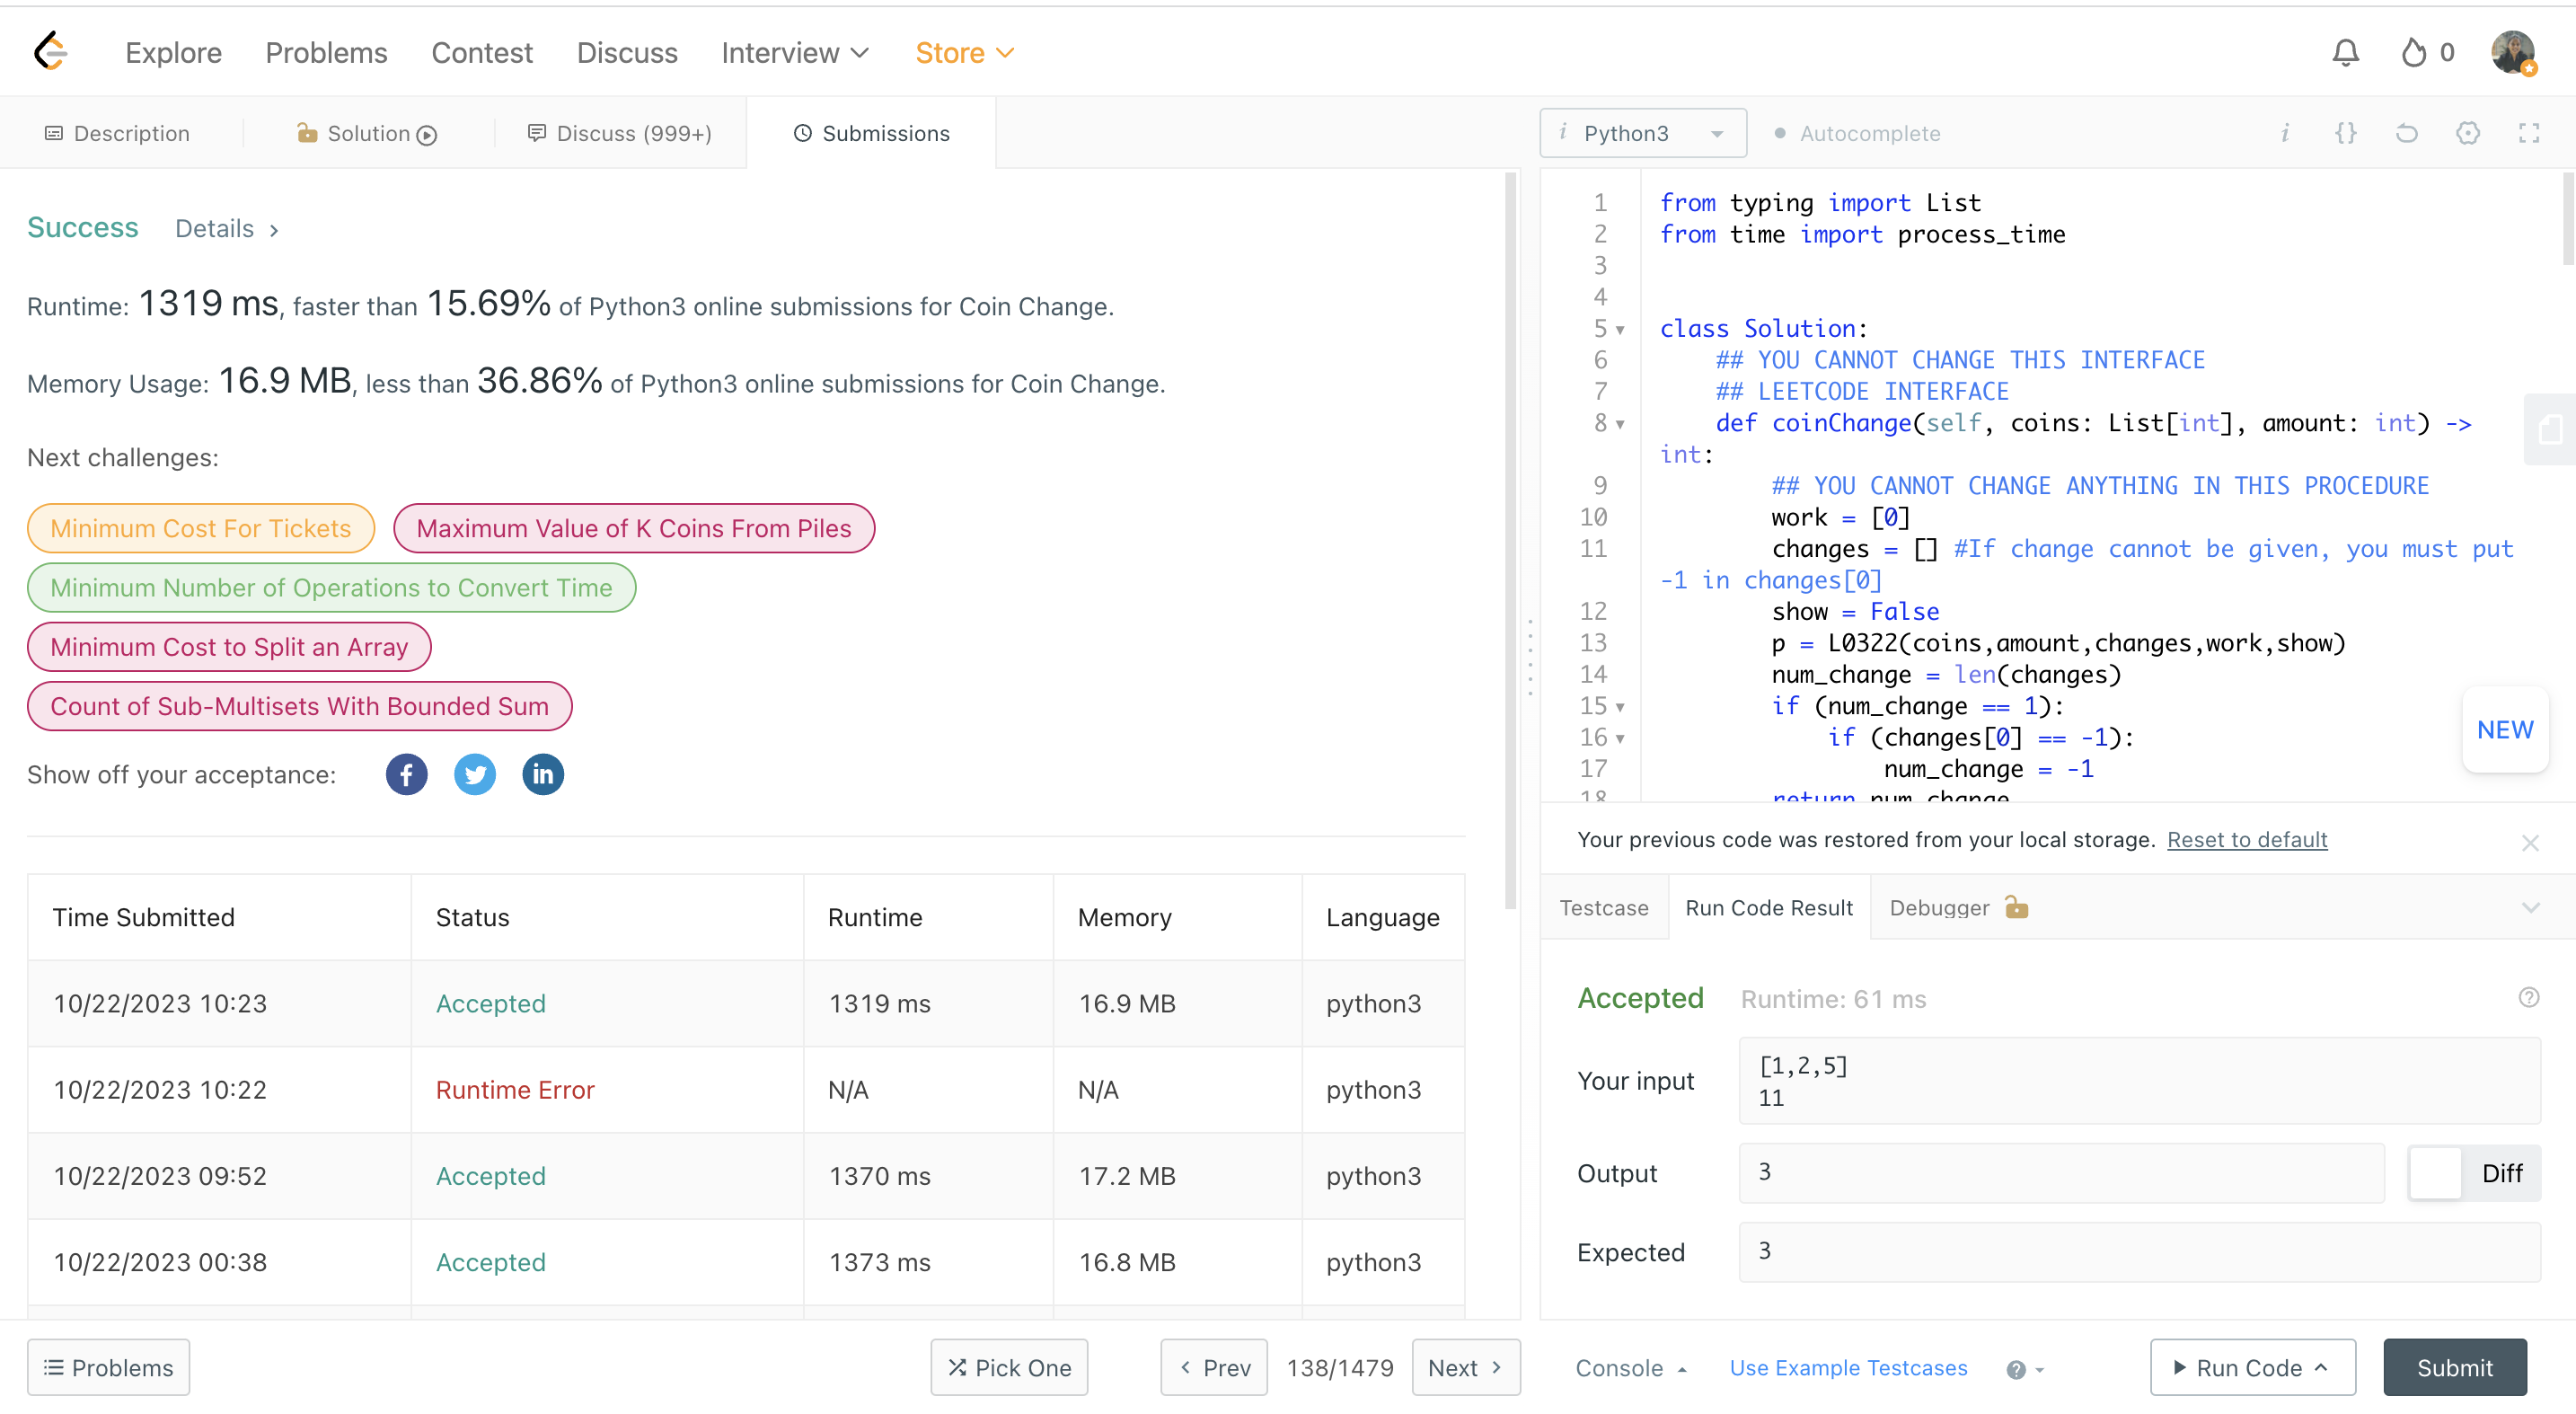